In [1]:
# ============================================================
# 1. IMPORT LIBRARIES
# ============================================================

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
# ============================================================
# 2. LOAD AND PREPROCESS DATASET
# ============================================================

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test  = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [4]:
# ============================================================
# 3. CNN MODEL FUNCTION
# ============================================================

def build_cnn(kernel_size, filters):
    model = Sequential([
        Conv2D(filters, kernel_size, activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters * 2, kernel_size, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [5]:
# ============================================================
# 4. EXPERIMENT CONFIGURATIONS
# ============================================================

experiments = {
    "3x3_32filters": {"kernel": (3,3), "filters": 32},
    "5x5_32filters": {"kernel": (5,5), "filters": 32},
    "3x3_64filters": {"kernel": (3,3), "filters": 64},
    "5x5_64filters": {"kernel": (5,5), "filters": 64}
}

history_dict = {}
test_results = []

In [6]:
# ============================================================
# PRINT MODEL SUMMARY FOR EACH CONFIGURATION
# ============================================================

for name, params in experiments.items():
    print("\n" + "="*60)
    print(f"Model Summary: {name}")
    print(f"Kernel Size: {params['kernel']} | Filters: {params['filters']}")
    print("="*60)

    model = build_cnn(params["kernel"], params["filters"])
    model.summary()


Model Summary: 3x3_32filters
Kernel Size: (3, 3) | Filters: 32


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)


Model Summary: 5x5_32filters
Kernel Size: (5, 5) | Filters: 32


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,914 (1015.29 KB)

 Trainable params: 259,914 (1015.29 KB)

 Non-trainable params: 0 (0.00 B)


Model Summary: 3x3_64filters
Kernel Size: (3, 3) | Filters: 64


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 666,890 (2.54 MB)

 Trainable params: 666,890 (2.54 MB)

 Non-trainable params: 0 (0.00 B)


Model Summary: 5x5_64filters
Kernel Size: (5, 5) | Filters: 64


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 620,810 (2.37 MB)

 Trainable params: 620,810 (2.37 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# ============================================================
# 5. TRAIN MODELS
# ============================================================

for name, params in experiments.items():
    print(f"\nTraining Model: {name}")

    model = build_cnn(params["kernel"], params["filters"])

    history = model.fit(
        X_train, y_train,
        epochs=15,
        batch_size=64,
        validation_split=0.2,
        verbose=1
    )

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    history_dict[name] = history
    test_results.append([name, test_acc])

    print(f"Test Accuracy for {name}: {test_acc:.4f}")



Training Model: 3x3_32filters
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3705 - loss: 1.7343 - val_accuracy: 0.5481 - val_loss: 1.2673
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5759 - loss: 1.2011 - val_accuracy: 0.6041 - val_loss: 1.1141
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6359 - loss: 1.0306 - val_accuracy: 0.6377 - val_loss: 1.0337
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6759 - loss: 0.9239 - val_accuracy: 0.6538 - val_loss: 1.0036
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7056 - loss: 0.8423 - val_accuracy: 0.6603 - val_loss: 0.9796
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7319 - loss: 0.7725 - val_accuracy: 0.6706 - val_loss: 0.9694
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7559 - loss: 0.7061 - val_accuracy: 0.6727 - val_loss: 0.9993
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7794 -

In [8]:
# ============================================================
# 6. CONVERT RESULTS TO DATAFRAME
# ============================================================

results_df = pd.DataFrame(test_results, columns=["Model", "Test Accuracy"])
print("\nFinal Test Accuracy Comparison:\n")
print(results_df)


Final Test Accuracy Comparison:

           Model  Test Accuracy
0  3x3_32filters         0.6520
1  5x5_32filters         0.6356
2  3x3_64filters         0.6640
3  5x5_64filters         0.6427


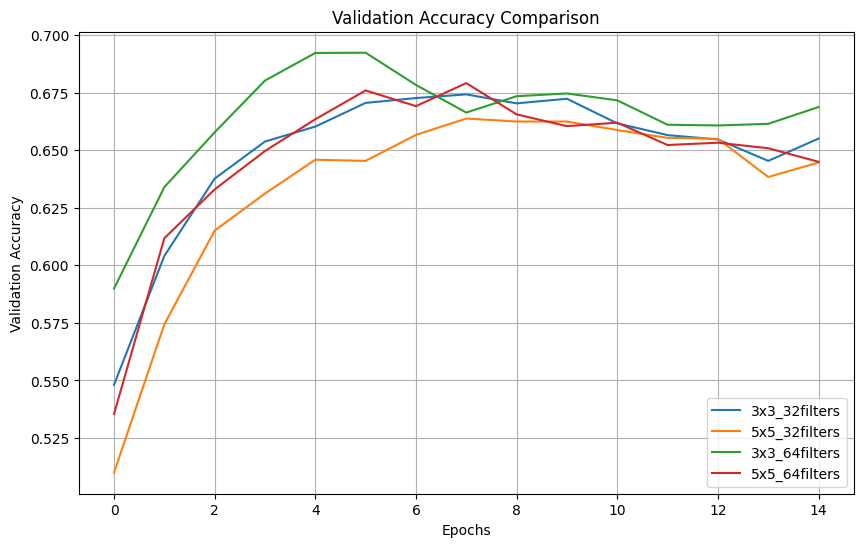

In [9]:
# ============================================================
# 7. PLOT ACCURACY CURVES
# ============================================================

plt.figure(figsize=(10,6))

for name, history in history_dict.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

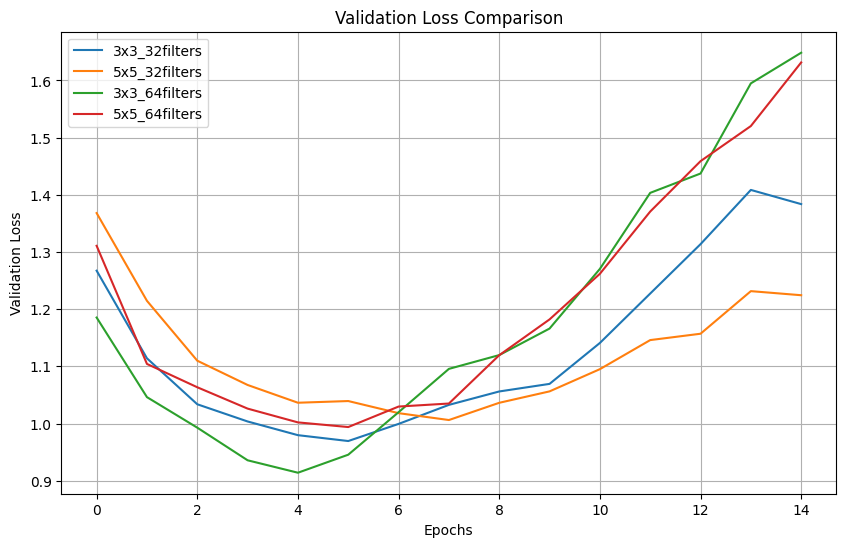

In [10]:
# ============================================================
# 8. PLOT LOSS CURVES
# ============================================================

plt.figure(figsize=(10,6))

for name, history in history_dict.items():
    plt.plot(history.history['val_loss'], label=name)

plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

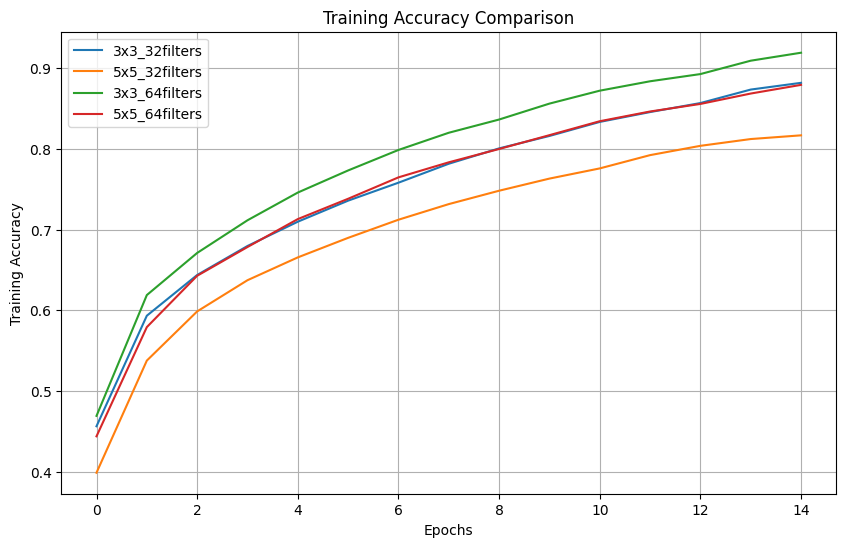

In [11]:
# ============================================================
# PLOT TRAINING ACCURACY COMPARISON
# ============================================================

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=name)

plt.title("Training Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.legend()
plt.grid(True)
plt.show()

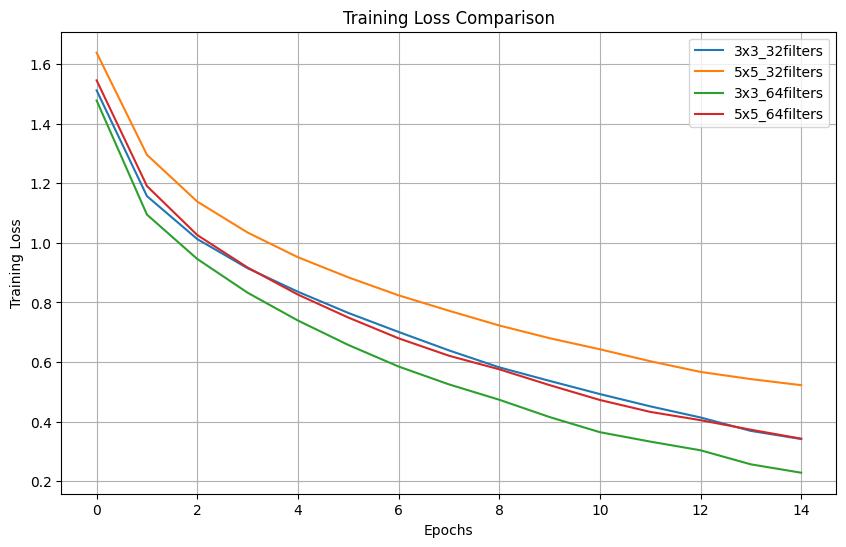

In [12]:
# ============================================================
# PLOT TRAINING LOSS COMPARISON
# ============================================================

plt.figure(figsize=(10, 6))

for name, history in history_dict.items():
    plt.plot(history.history['loss'], label=name)

plt.title("Training Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend()
plt.grid(True)
plt.show()